### Tolls of FLDR and ALDR trees for uniform distributions

In [1]:
from customtree import *
from customtreeplot import *

In [2]:
def get_fldr_toll(m):
    # compute the toll of FLDR on a uniform distribution [1]*m
    # ! this assumes that m is odd
    k = m.bit_length()
    w, rem = divmod((1 << k), m)
    cost_one_round = nu(rem, k) + m * nu(w, k)
    total_cost = cost_one_round * ((1 << k) / (w * m))
    return total_cost - math.log2(m)

In [3]:
def get_fldr_toll_components(m):
    # compute the components of the FLDR toll
    # (tq, hb(rem/2^k), and multiplier)
    # for a uniform distribution [1]*m
    # ! this assumes that m is odd
    k = m.bit_length()
    w, rem = divmod((1 << k), m)
    hqtq = nu(rem, k) + m * nu(w, k)
    hq = (w * m * k + rem * math.log2((1<<k) / rem)) / (1 << k)
    tq = hqtq - hq
    multiplier = ((1 << k) / (w * m))
    return tq, Hb(rem / (1<<k)), multiplier

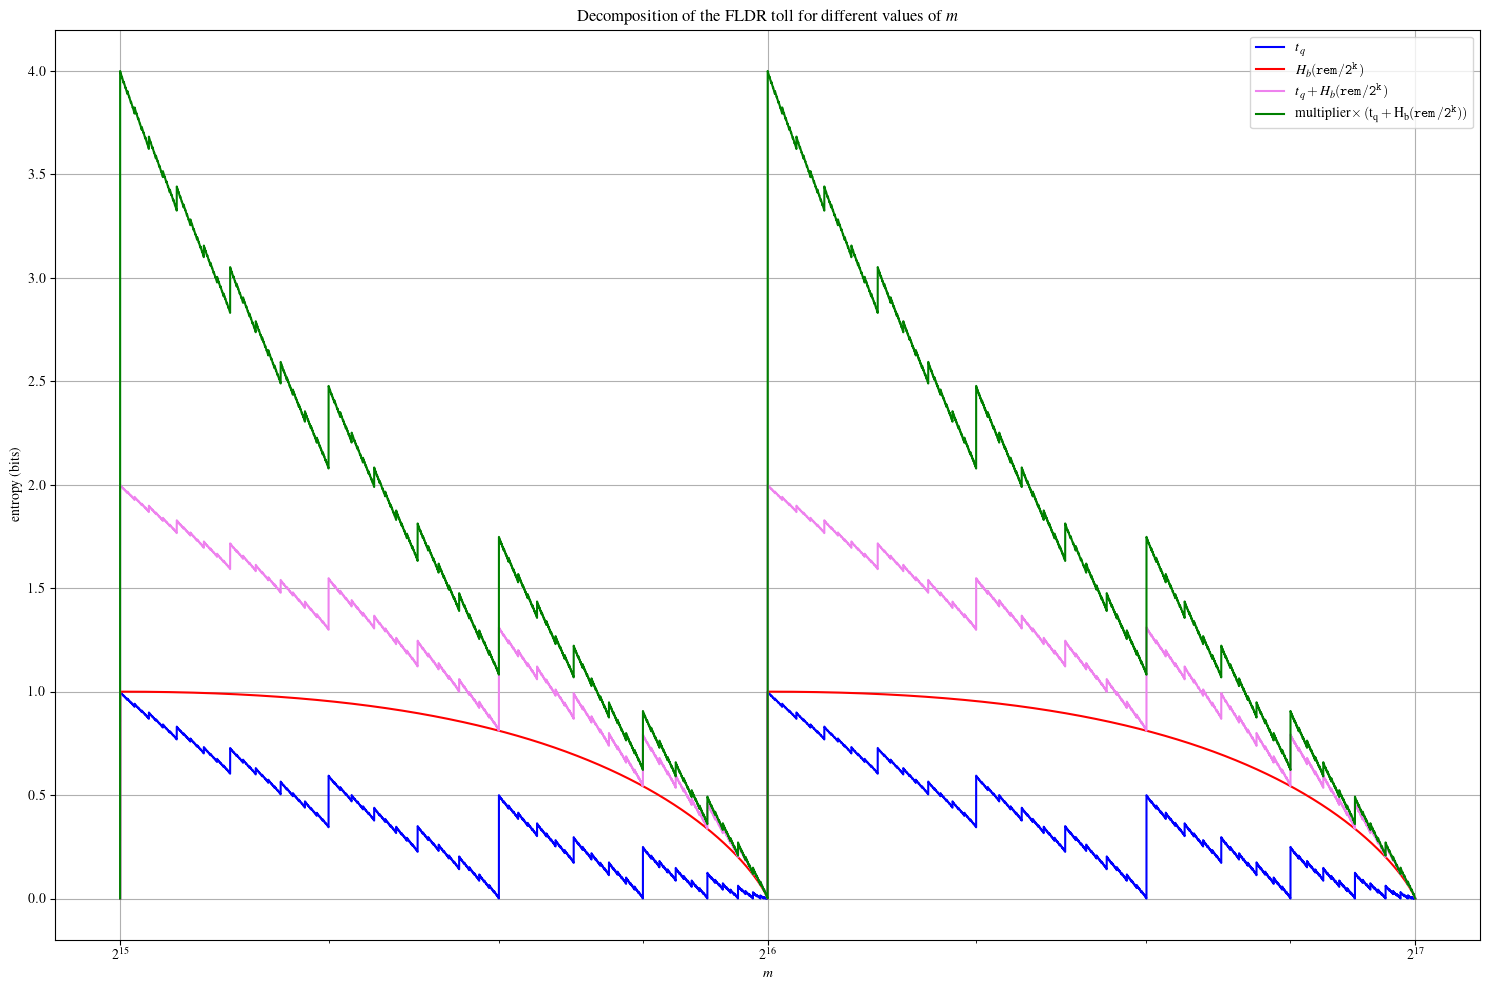

In [4]:
# plot the decomposition of the toll in terms of tq, hb(rem/2^k), and multiplier
min_xtick = 15
max_xtick = 17
plot_domain = range((1<<min_xtick)-1, (1<<max_xtick), 2)
tqs, hbs, mults = zip(*(get_fldr_toll_components(n) for n in plot_domain))
fig, ax = plt.subplots()
ax.plot(plot_domain, tqs, color='blue', label=r'$t_q$')
ax.plot(plot_domain, hbs, color='red', label=r'$H_b(\tt{rem}/2^k)$')
ax.plot(plot_domain, [(tq+hb) for tq,hb in zip(tqs,hbs)], color='violet', label=r'$t_q+H_b(\tt{rem}/2^k)$')
ax.plot(plot_domain, [mult*(tq+hb) for tq,hb,mult in zip(tqs,hbs,mults)], color='green', label=r'$\rm{multiplier} \times (t_q+H_b(\tt{rem}/2^k))$')
ax.set_xscale('log', base=2)
ax.xaxis.set_major_locator(ticker.LogLocator(base=2., subs=(1.,), numticks=24))
ax.xaxis.set_minor_locator(ticker.LogLocator(base=2., subs=[3,5,7], numticks=200))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.grid()
fig.set_size_inches(15, 10)
fig.set_tight_layout(True)
fig.set_facecolor('white')
# title
ax.set_title('Decomposition of the FLDR toll for different values of $m$')
# labels
ax.set_xlabel('$m$')
ax.set_ylabel('entropy (bits)')
# legend
ax.legend()
plt.show()

[(3.9996422981514606, 65537), (3.9993151235297244, 32769), (3.9990184747374364, 65539), (3.998455718552208, 65541), (3.9981285806584914, 32771), (3.9978319667301676, 65543), (3.997391331956898, 65545), (3.997064228922561, 32773), (3.9967676479898557, 65547), (3.9962050237902496, 65549)]


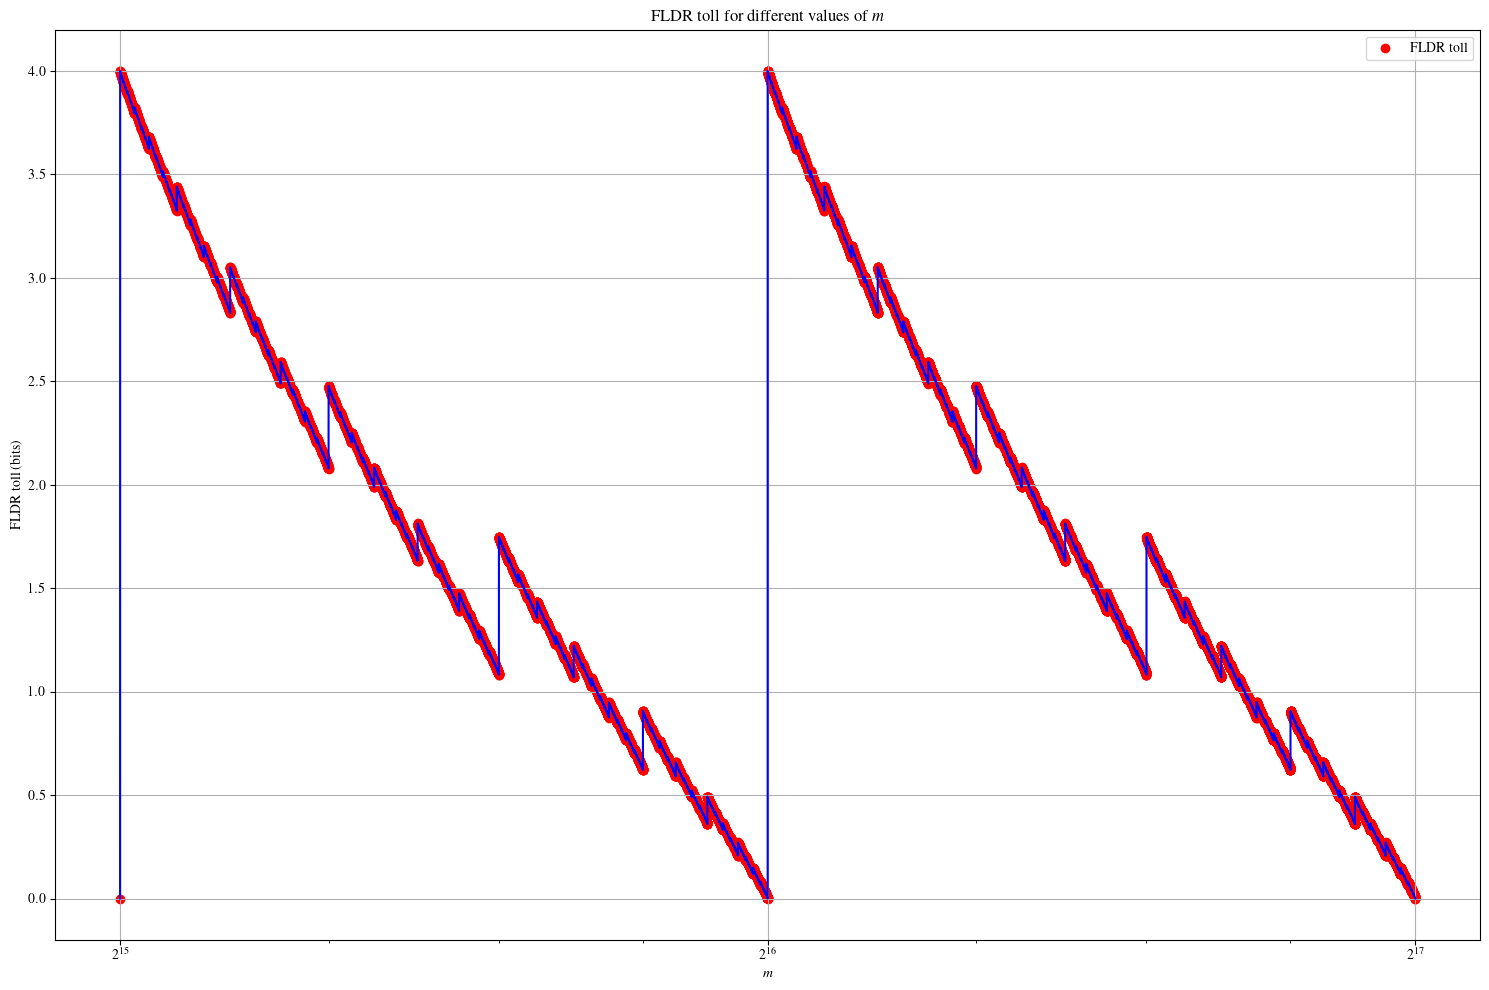

In [5]:
# plot the FLDR toll for different odd uniform distributions
min_xtick = 15
max_xtick = 17
plot_domain = range((1<<min_xtick)-1, (1<<max_xtick), 2)
fldr_tolls = [get_fldr_toll(n) for n in plot_domain]
print(sorted((zip(fldr_tolls, plot_domain)))[-1:-11:-1])
fig, ax = plt.subplots()
ax.plot(plot_domain, fldr_tolls, color='blue')
ax.scatter(plot_domain, fldr_tolls, color='red', label='FLDR toll')
ax.set_xscale('log', base=2)
ax.xaxis.set_major_locator(ticker.LogLocator(base=2., subs=(1.,), numticks=24))
ax.xaxis.set_minor_locator(ticker.LogLocator(base=2., subs=[3,5,7], numticks=200))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.grid()
fig.set_size_inches(15, 10)
fig.set_tight_layout(True)
fig.set_facecolor('white')
# title
ax.set_title('FLDR toll for different values of $m$')
# labels
ax.set_xlabel('$m$')
ax.set_ylabel('FLDR toll (bits)')
# legend
ax.legend()
plt.show()

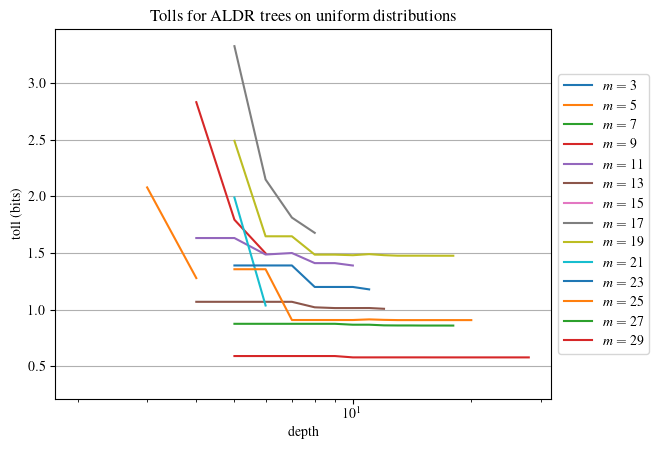

In [6]:
for m in range(3, 30, 2):
    plot_tolls_uniform(m)
plt.xscale('log')
plt.grid(axis='y')
# title
plt.title('Tolls for ALDR trees on uniform distributions')
# labels
plt.xlabel('depth')
plt.ylabel('toll (bits)')
# legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

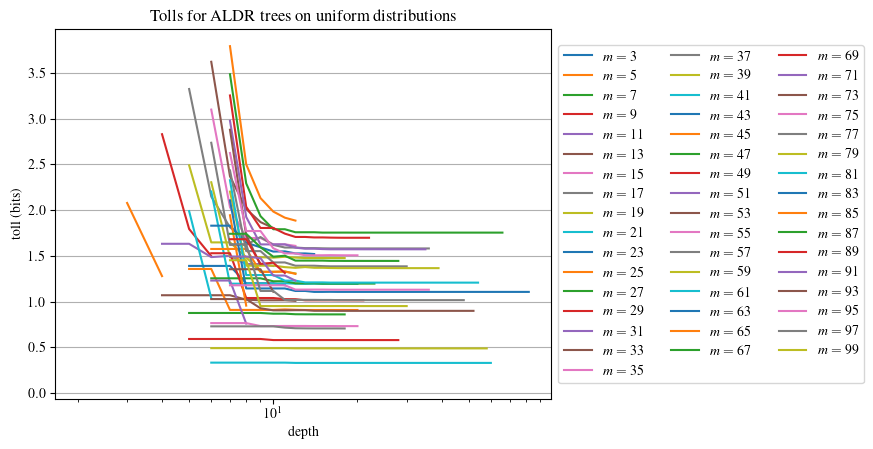

In [7]:
for m in range(3, 100, 2):
    plot_tolls_uniform(m)
plt.xscale('log')
plt.grid(axis='y')
# title
plt.title('Tolls for ALDR trees on uniform distributions')
# labels
plt.xlabel('depth')
plt.ylabel('toll (bits)')
# legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
plt.show()

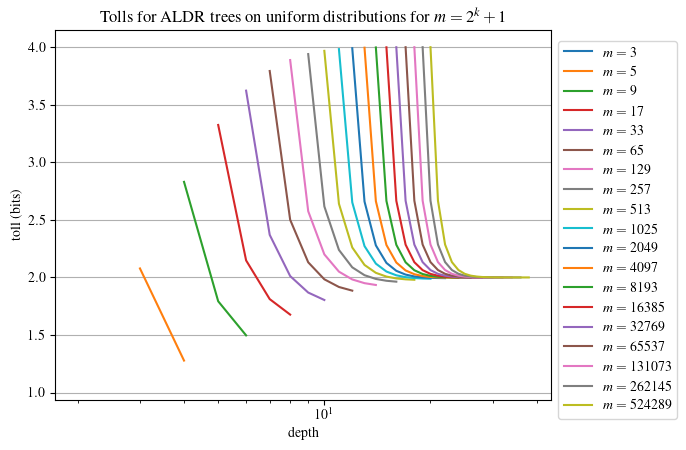

In [8]:
for k in range(1, 20):
    plot_tolls_uniform((1<<k)+1)
plt.xscale('log')
plt.grid(axis='y')
# title
plt.title('Tolls for ALDR trees on uniform distributions for $m = 2^k+1$')
# labels
plt.xlabel('depth')
plt.ylabel('toll (bits)')
# legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.46))
plt.show()

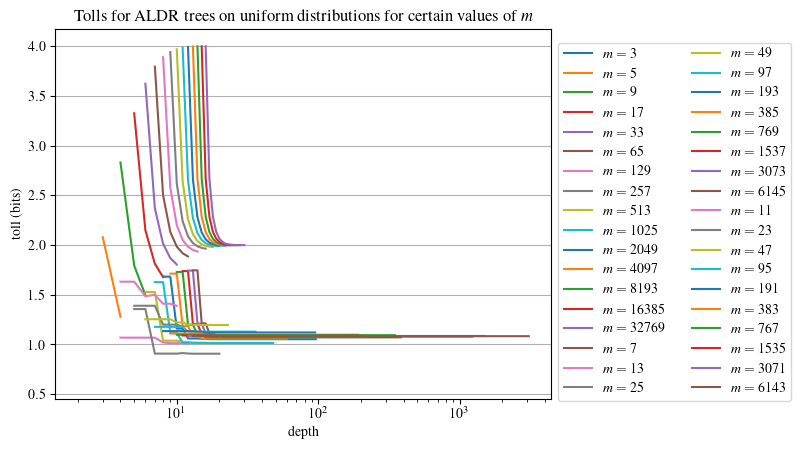

In [9]:
for k in range(1, 16):
    plot_tolls_uniform((1<<k)+1)
for k in range(2, 13):
    plot_tolls_uniform((1<<(k-1))*3+1)
for k in range(3, 13):
    plot_tolls_uniform((1<<(k-1))*3-1)
plt.xscale('log')
plt.grid(axis='y')
# title
plt.title('Tolls for ALDR trees on uniform distributions for certain values of $m$')
# labels
plt.xlabel('depth')
plt.ylabel('toll (bits)')
# legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.48), ncol=2)
plt.show()

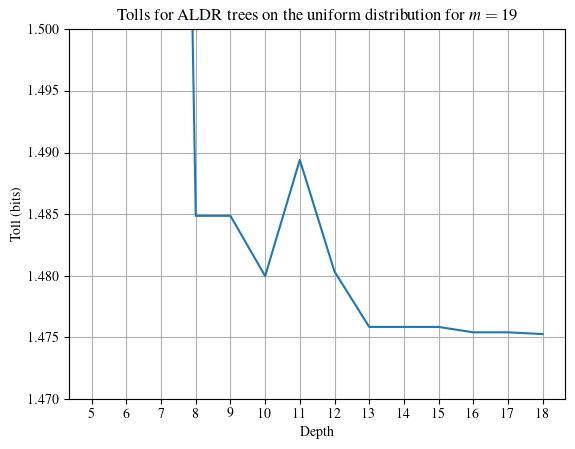

In [10]:
# counterexample for the conjecture that the toll is monotonically non-increasing
plot_tolls_uniform(19)
# draw gridlines as default for y axis
plt.grid(axis='y')
# set x axis to major ticks at every integer
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
# draw gridlines for every integer on x axis
plt.grid(axis='x')
# title
plt.title('Tolls for ALDR trees on the uniform distribution for $m=19$')
# labels
plt.xlabel('Depth')
plt.ylabel('Toll (bits)')
# restrict y axis from 1.47 to 0.5
plt.ylim(1.47,1.5)
plt.show()